In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [265]:
df=pd.read_csv("Country-data.csv")

In [149]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [37]:
temp=pd.read_csv("data-dictionary.csv")

In [6]:
temp

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [150]:
len(list(df["country"].unique()))

167

In [266]:
df=df.drop("country",axis=1)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


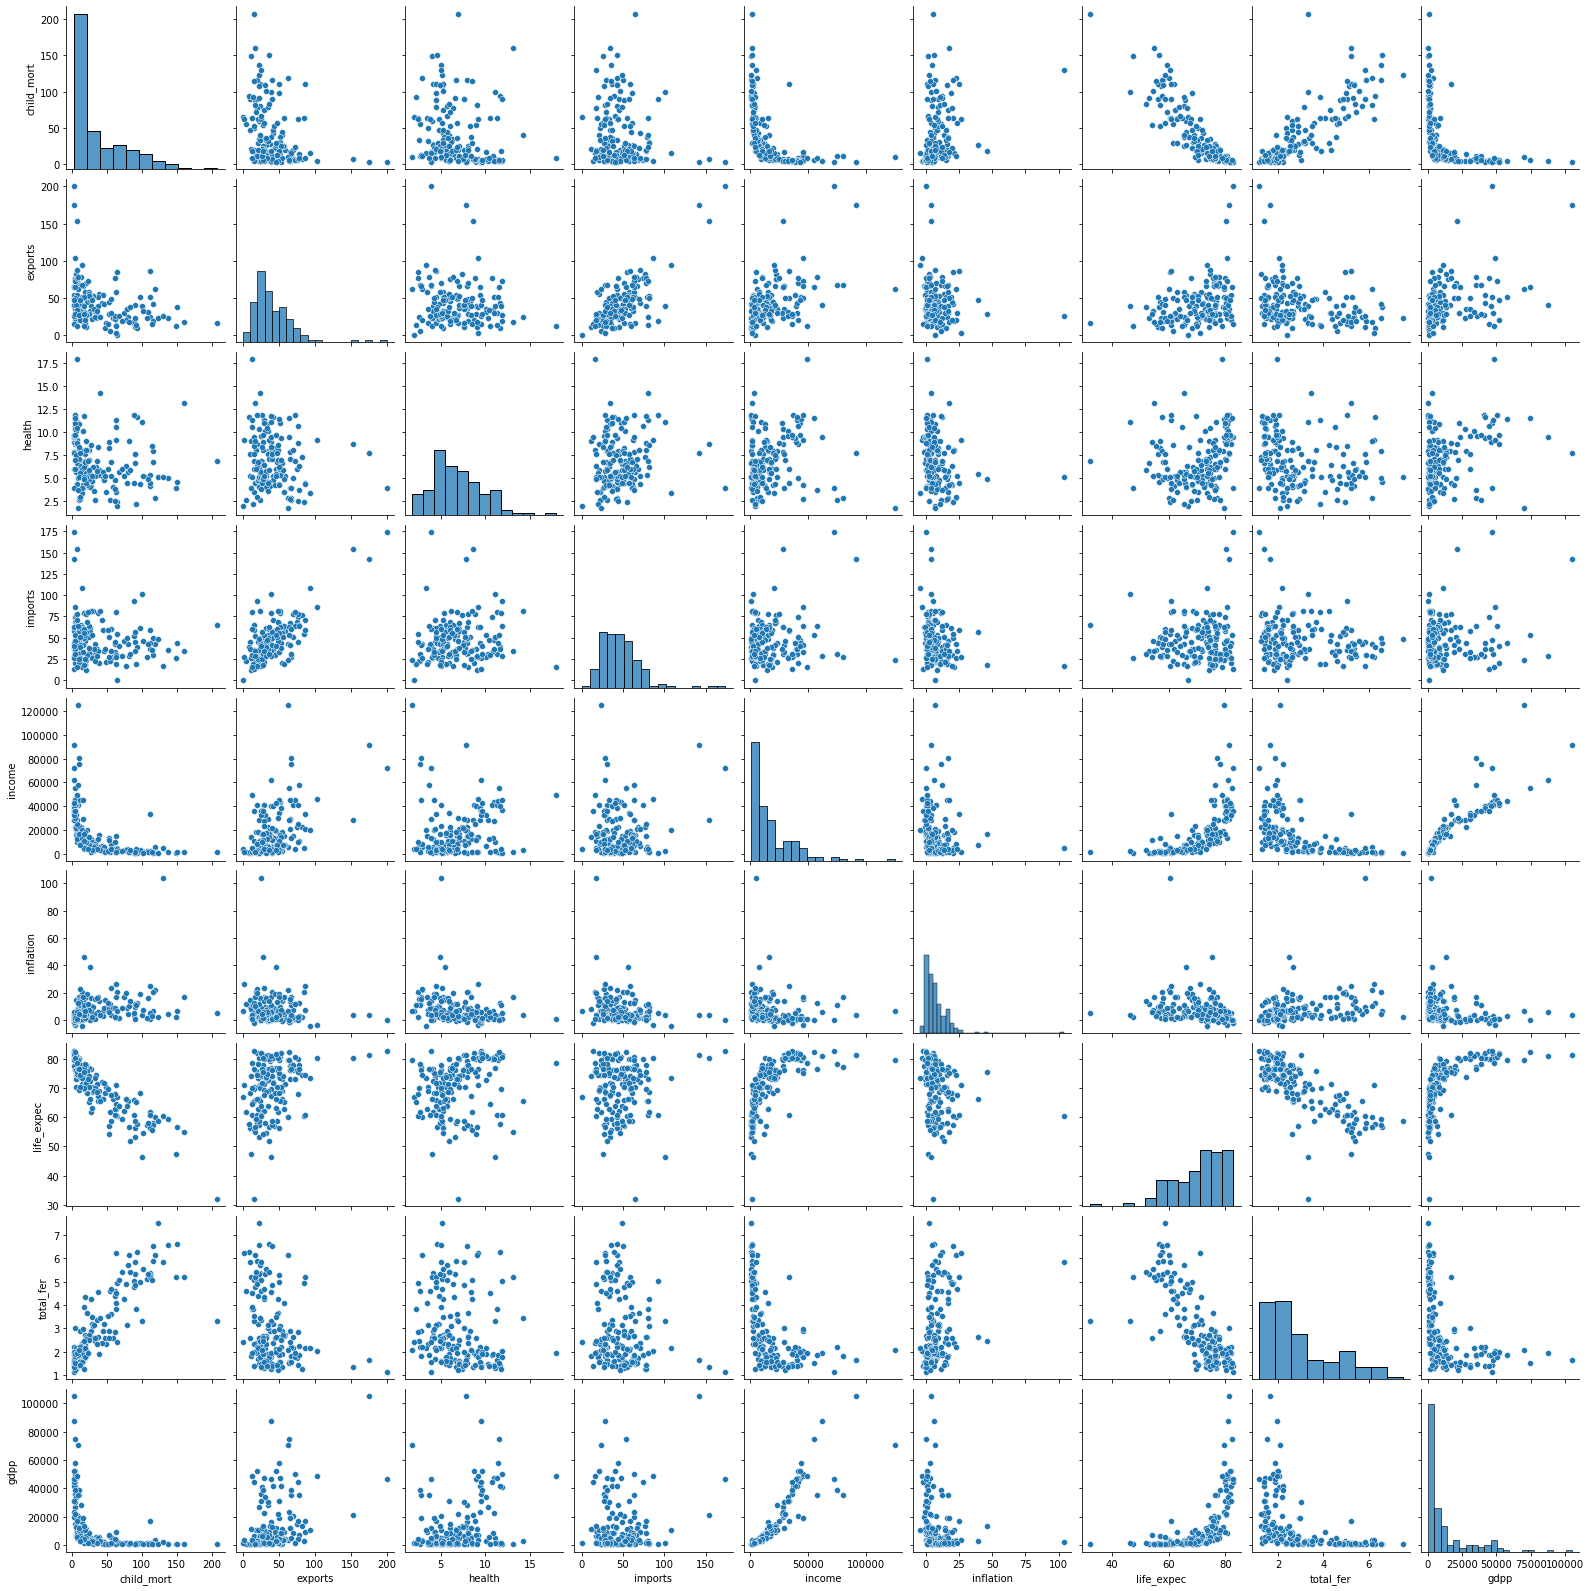

In [12]:
sns.pairplot(df)

<AxesSubplot:xlabel='exports', ylabel='Count'>

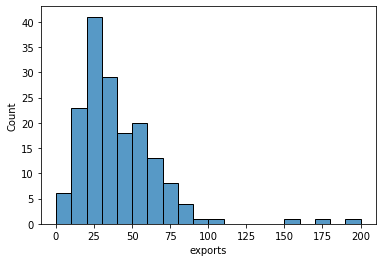

In [224]:
sns.histplot(df["exports"])

In [267]:
df=df[df["exports"]<125]

<AxesSubplot:xlabel='income', ylabel='Count'>

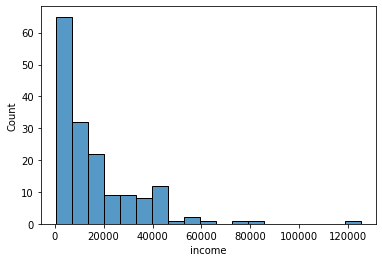

In [227]:
sns.histplot(df["income"])

In [268]:
df=df[df["income"]<49000]

<AxesSubplot:xlabel='gdpp', ylabel='Count'>

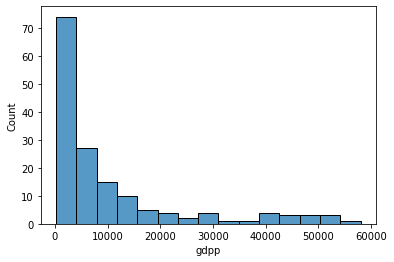

In [229]:
sns.histplot(df["gdpp"])

array([[<AxesSubplot:title={'center':'child_mort'}>,
        <AxesSubplot:title={'center':'exports'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'imports'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'inflation'}>],
       [<AxesSubplot:title={'center':'life_expec'}>,
        <AxesSubplot:title={'center':'total_fer'}>,
        <AxesSubplot:title={'center':'gdpp'}>]], dtype=object)

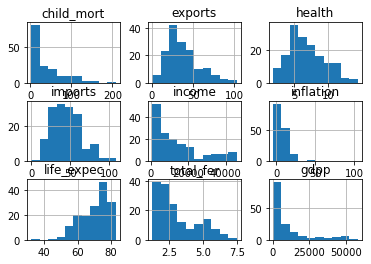

In [230]:
df.hist()

<AxesSubplot:xlabel='life_expec', ylabel='Count'>

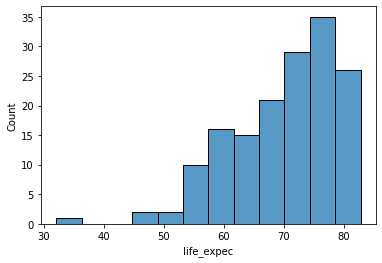

In [231]:
sns.histplot(df["life_expec"])

In [269]:
df=df[df["life_expec"]>40]

<AxesSubplot:>

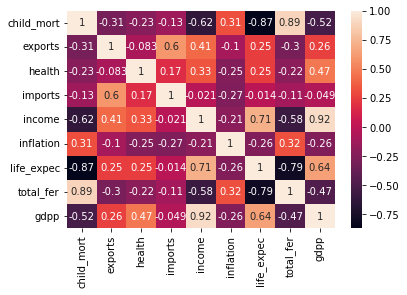

In [234]:
sns.heatmap(df.corr(),annot=True)

In [111]:
from sklearn.preprocessing import StandardScaler

In [113]:
ss=StandardScaler()

In [253]:
df_standard=pd.DataFrame(ss.fit_transform(df))

In [254]:
df_standard.describe()

,0,1,2,3,4,5
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,1.565699e-17,-5.648971e-18,4.252297e-17,1.423363e-18,-3.416071e-17,-1.423363e-18
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-2.226859e+00,-2.226413e+00,-2.760313e+00,-1.571135e+00,-2.301911e+00,-2.851000e+00
25%,-6.801697e-01,-6.703328e-01,-6.262325e-01,-7.332747e-01,-5.416423e-01,-5.049755e-01
50%,-3.765600e-02,-4.717492e-02,-1.016802e-02,-1.474325e-01,-8.463461e-02,-2.013117e-02
75%,7.766772e-01,7.006255e-01,6.321666e-01,4.974585e-01,4.225686e-01,5.664945e-01
max,2.410283e+00,3.407083e+00,3.491152e+00,5.339020e+00,5.505606e+00,3.882725e+00


In [66]:
from sklearn.decomposition import PCA

In [237]:
pca= PCA(.95)

In [255]:
df_pca=pca.fit_transform(df_standard)

In [256]:
df_pca.shape

(156, 6)

In [250]:
from sklearn.cluster import KMeans

In [276]:
km=KMeans(n_clusters=3)

In [277]:
km.fit(df)

KMeans(n_clusters=3)

In [278]:
df["labels"]=km.labels_

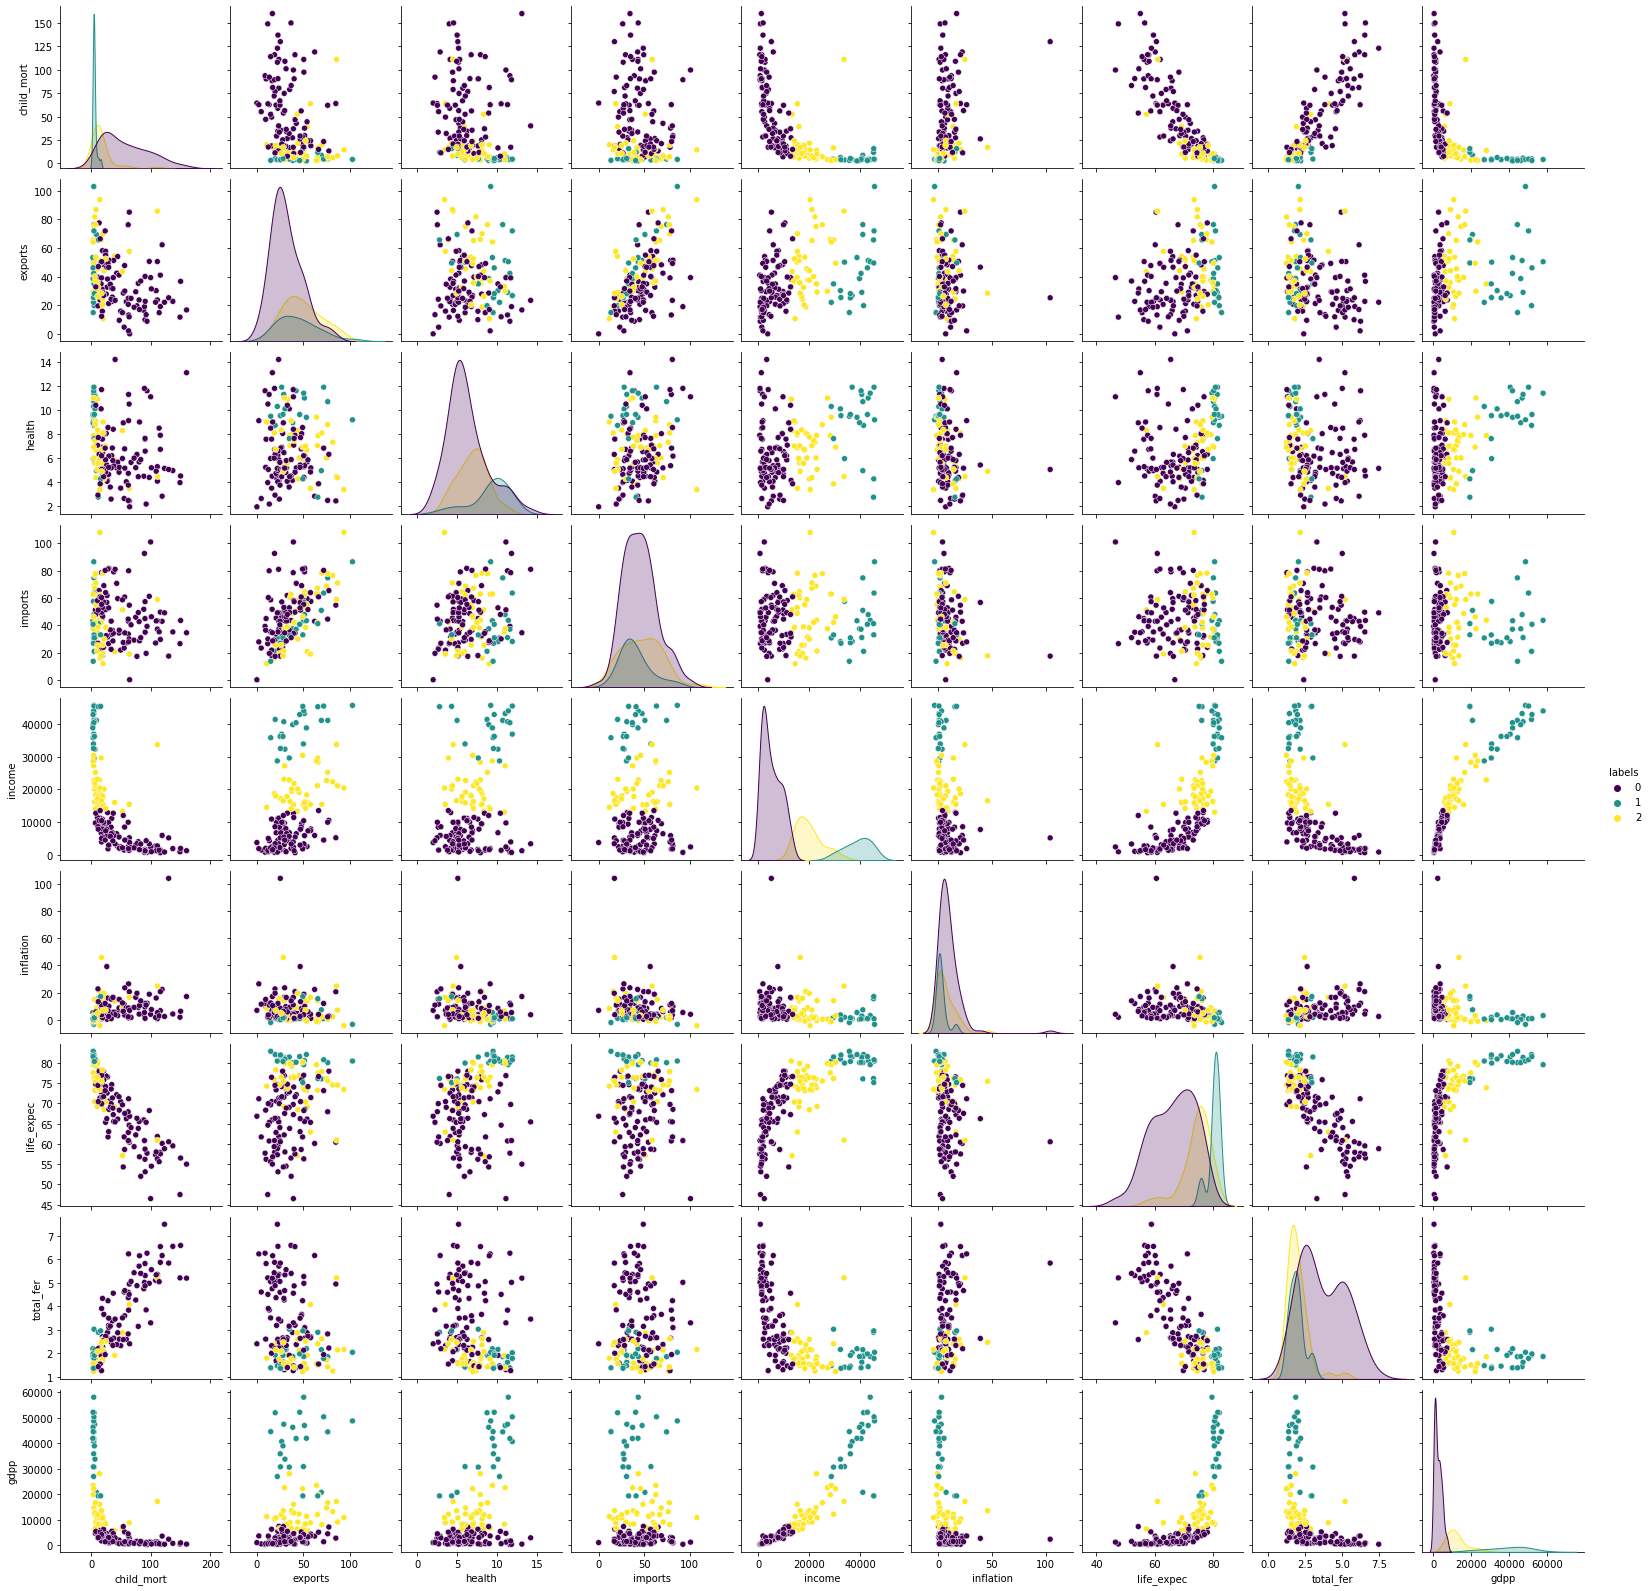

In [286]:
plot=sns.pairplot(df,hue="labels",palette="viridis")
plot.savefig("pairplot.png")

<AxesSubplot:xlabel='labels', ylabel='child_mort'>

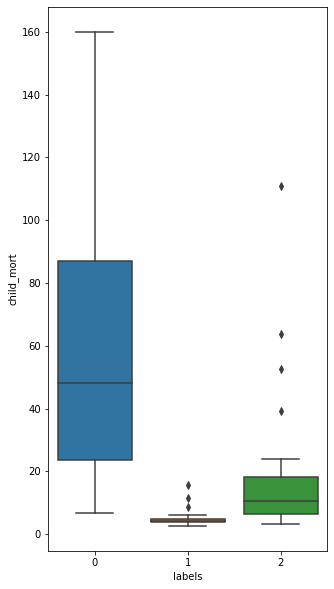

In [316]:
plt.figure(figsize=(5,10))
sns.boxplot(data=df,x="labels",y="child_mort")

<AxesSubplot:xlabel='labels', ylabel='gdpp'>

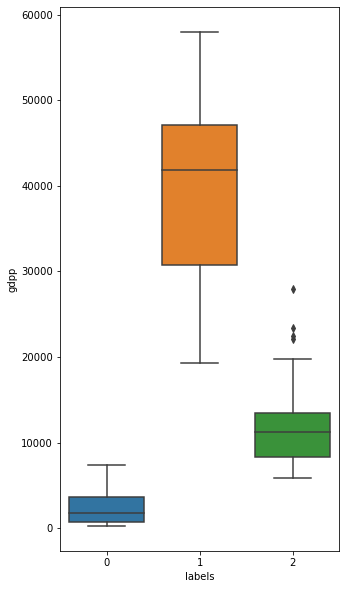

In [318]:
plt.figure(figsize=(5,10))
sns.boxplot(data=df,x="labels",y="gdpp")

<AxesSubplot:xlabel='labels', ylabel='life_expec'>

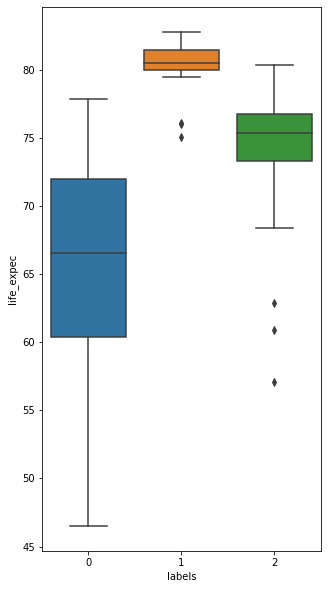

In [320]:
plt.figure(figsize=(5,10))
sns.boxplot(data=df,x="labels",y="life_expec")